In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('2021-data-engineer-survey-results.csv')
schema = pd.read_csv('2021-data-engineer-survey-questions.csv', encoding="cp1252")
df.head()

,GENDER,AGE,EMPLOYMENT,STATE,REGION,EDUCATION,QA_M1,QA_M2,QA_M3,QA_M4,...,Q14_M3,Q14_M4,Q14_M5,Q15,QE,QF,QG,QH,QI,QJ
0,Male,39,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,"Develop, maintain, and optimize data systems t...",Ensure that the data architecture will scale a...,Write and test code,...,NaN,NaN,NaN,Agree somewhat,10,10,11,1500,$50 Million to under $100 Million,Information technology (IT) / software
1,Male,39,\tWork full-time,Florida,South,\tBachelor’s degree,"Develop, maintain, and optimize data systems t...",Maintain the distributed systems that execute ...,Write and test code,Manage continuous integration and continuous d...,...,Lack of knowledge around what DataOps is,NaN,NaN,Agree somewhat,5,10,50,2000,$10 Million to under $25 Million,Banking
2,Male,34,\tWork full-time,Florida,South,\tGraduate or post-graduate work,Create data pipelines,"Develop, maintain, and optimize data systems t...",Write tests to ensure that bad data is detecte...,Maintain the distributed systems that execute ...,...,NaN,NaN,NaN,Agree strongly,10,15,20,20,$1 Billion or more,Information technology (IT) / software
3,Male,38,\tWork full-time,Wisconsin,Midwest,\tGraduate or post-graduate work,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,Manage continuous integration and continuous d...,NaN,...,NaN,NaN,NaN,Agree strongly,18,18,45,250,$100 Million to under $250 Million,Information technology (IT) / software
4,Male,39,\tWork full-time,Georgia,South,\tGraduate or post-graduate work,Manage continuous integration and continuous d...,Maintain the distributed systems that execute ...,Maintain data in ready-to-use formats,"Develop, maintain, and optimize data systems t...",...,NaN,NaN,NaN,Agree somewhat,6,7,10,999,$250 Million to under $500 Million,Banking


In [4]:
df.columns

Index(['GENDER', 'AGE', 'EMPLOYMENT', 'STATE', 'REGION', 'EDUCATION', 'QA_M1',
       'QA_M2', 'QA_M3', 'QA_M4', 'QA_M5', 'QA_M6', 'QA_M7', 'QA_M8', 'QB',
       'QC', 'QD', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5_M1', 'Q5_M2', 'Q5_M3', 'Q5_M4',
       'Q5_M5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14_M1',
       'Q14_M2', 'Q14_M3', 'Q14_M4', 'Q14_M5', 'Q15', 'QE', 'QF', 'QG', 'QH',
       'QI', 'QJ'],
      dtype='object')

In [5]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 600
Number of columns: 46


In [5]:
schema['Question Text']

0                           What is your gender please?
1                                     What is your age?
2                      What is your employment status? 
3                  What state do you work in currently?
4     What is the highest level of formal education ...
5     Which of the following describes the departmen...
6     At your current company, which of the followin...
7     Which of the following best describes your cur...
8     Do you currently work in a management-level po...
9     To what extent, if at all, has your company im...
10    Which of the following best describes the reli...
11    How often do you get data requests with unreas...
12    What percent of the time do you receive reques...
13    What percent of the time do you receive reques...
14    Which of the following, if any, have ever cont...
15    How strongly do you agree or disagree with the...
16    How often, if ever, does the data engineering ...
17    How often, if ever, is your work-life bala

In [6]:
schema['Question Text'][3]

'What state do you work in currently?'

In [7]:
#using this helpful function that we applied in the excercise 
def get_question(col, schema=schema):

    quest = list(schema[schema['Metric Label'] == col]['Question Text'])[0]
    
    return quest

get_question('Q3')
#Note: this will work for all columns except the questions that are represented in multiple-column scheme

'What percent of the time do you receive requests in your job that are simply not possible to do in the time requested? Please give your answer as a percent. Your best guess is fine.'

In [8]:
df.columns.get_loc('Q8')

28

In [9]:
df['QA_M1'].value_counts()

Develop, maintain, and optimize data systems to make data available for analysis                 92
Maintain data in ready-to-use formats                                                            77
Ensure that the data architecture will scale appropriately                                       72
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    71
Maintain the distributed systems that execute data pipelines                                     69
Write tests to ensure that bad data is detected and acted upon in production                     64
Write and test code                                                                              61
Create data pipelines                                                                            51
Put analytics into production                                                                    43
Name: QA_M1, dtype: int64

In [10]:
df['Q8'].value_counts() #2, 7, 8

Sometimes       232
Often           187
All the time    115
Rarely           56
Never            10
Name: Q8, dtype: int64

In [11]:
q1 = get_question(14)
q2 = get_question(17)
q3 = get_question(18)
print(q1, '\n', q2, '\n', q3)

IndexError: ignored

In [ ]:
list(df['Q2'].values)

Using the example provided by matplotlib : https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

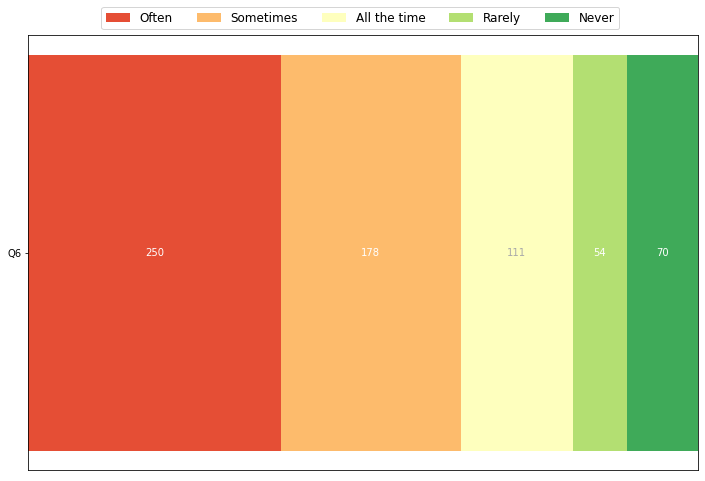

In [12]:

category_names = ['Often', 'Sometimes',
                  'All the time', 'Rarely', 'Never']
results = {
    'Q6': [250, 178,  111, 54, 70]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.01,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.1, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)
plt.show()

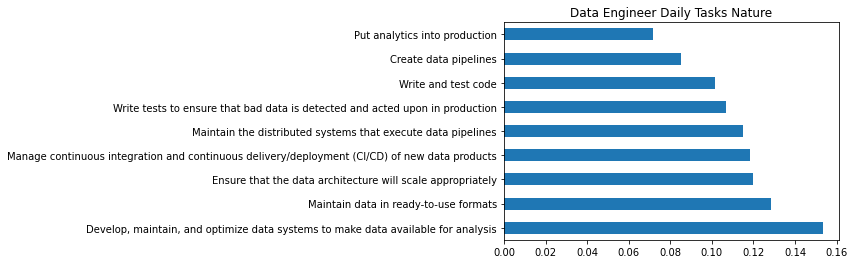

In [13]:
daily_tasks = df['QA_M1'].value_counts()

(daily_tasks / df.shape[0]).plot( kind="barh" );
plt.title("Data Engineer Daily Tasks Nature");

In [14]:
daily_tasks / df.shape[0]

Develop, maintain, and optimize data systems to make data available for analysis                 0.153333
Maintain data in ready-to-use formats                                                            0.128333
Ensure that the data architecture will scale appropriately                                       0.120000
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    0.118333
Maintain the distributed systems that execute data pipelines                                     0.115000
Write tests to ensure that bad data is detected and acted upon in production                     0.106667
Write and test code                                                                              0.101667
Create data pipelines                                                                            0.085000
Put analytics into production                                                                    0.071667
Name: QA_M1, dtype: float64

In [15]:
a = df['QA_M2'].value_counts() + df['QA_M3'].value_counts() 
a = a + a
a

Create data pipelines                                                                            222
Develop, maintain, and optimize data systems to make data available for analysis                 312
Ensure that the data architecture will scale appropriately                                       242
Maintain data in ready-to-use formats                                                            254
Maintain the distributed systems that execute data pipelines                                     292
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    310
Put analytics into production                                                                    238
Write and test code                                                                              238
Write tests to ensure that bad data is detected and acted upon in production                     292
dtype: int64

In [6]:
#creating a function to group similar values of diffrent columns
def group_vals(columns):
  count = 0
  for i in columns:
    count =  df[i].value_counts() + count

  return count 
  
group_vals(['QA_M2', 'QA_M3'])   

Create data pipelines                                                                            111
Develop, maintain, and optimize data systems to make data available for analysis                 156
Ensure that the data architecture will scale appropriately                                       121
Maintain data in ready-to-use formats                                                            127
Maintain the distributed systems that execute data pipelines                                     146
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    155
Put analytics into production                                                                    119
Write and test code                                                                              119
Write tests to ensure that bad data is detected and acted upon in production                     146
dtype: int64

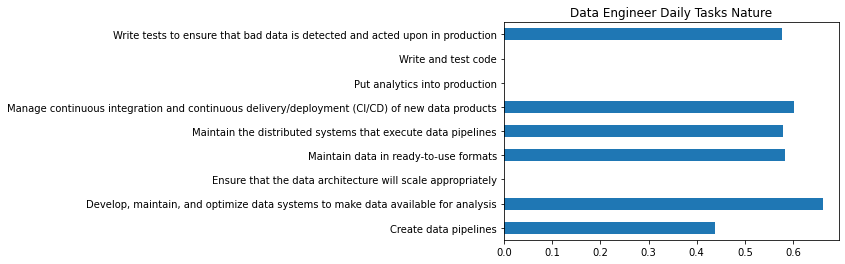

In [4]:
tasks = group_vals(['QA_M1','QA_M2','QA_M3',
                    'QA_M4','QA_M5','QA_M6',
                    'QA_M7','QA_M8'
])   

tasks
(tasks / df.shape[0]).plot( kind="barh" );
plt.title("Data Engineer Daily Tasks Nature");

In [5]:
type(tasks)

pandas.core.series.Series

In [34]:
tasks

0                                                                                                  NaN
Create data pipelines                                                                            263.0
Develop, maintain, and optimize data systems to make data available for analysis                 397.0
Ensure that the data architecture will scale appropriately                                         NaN
Maintain data in ready-to-use formats                                                            350.0
Maintain the distributed systems that execute data pipelines                                     348.0
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    361.0
Put analytics into production                                                                      NaN
Write and test code                                                                                NaN
Write tests to ensure that bad data is detected and acted upon in product

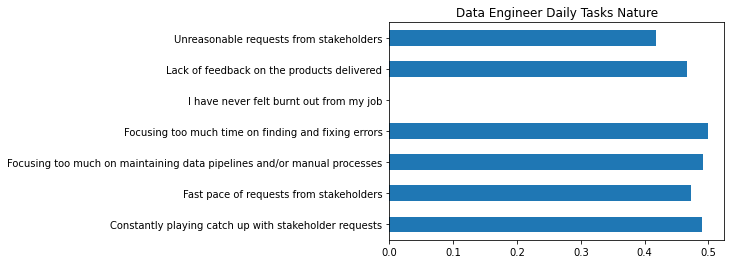

In [11]:
tasks = group_vals(['Q5_M1','Q5_M2','Q5_M3',
                    'Q5_M4'
])   

tasks
(tasks / df.shape[0]).plot( kind="barh" );
plt.title("Data Engineer Daily Tasks Nature");

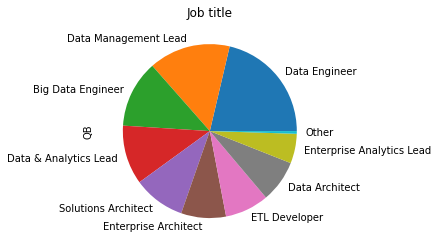

In [7]:
(df['QB'].value_counts() / df.shape[0]).plot( kind="pie" );
plt.title("Job title");

In [12]:
def fillNaN(col_name):
   df[col_name].fillna(0, inplace=True)

In [32]:
fillNaN('QA_M8')

In [6]:
df['QA_M1'].value_counts() 

Develop, maintain, and optimize data systems to make data available for analysis                 92
Maintain data in ready-to-use formats                                                            77
Ensure that the data architecture will scale appropriately                                       72
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    71
Maintain the distributed systems that execute data pipelines                                     69
Write tests to ensure that bad data is detected and acted upon in production                     64
Write and test code                                                                              61
Create data pipelines                                                                            51
Put analytics into production                                                                    43
Name: QA_M1, dtype: int64

In [7]:
counts = dict(df['QA_M1'].value_counts())
counts

{'Develop, maintain, and optimize data systems to make data available for analysis': 92,
 'Maintain data in ready-to-use formats': 77,
 'Ensure that the data architecture will scale appropriately': 72,
 'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products': 71,
 'Maintain the distributed systems that execute data pipelines': 69,
 'Write tests to ensure that bad data is detected and acted upon in production': 64,
 'Write and test code': 61,
 'Create data pipelines': 51,
 'Put analytics into production': 43}

In [24]:
def add_dict(dict2 , counts=counts):
  updated_counts = 0
  for i in counts:
    if i in dict2:
        counts[i] = counts[i] + dict2[i]
    else:
        pass
  updated_counts = counts   
  return updated_counts

In [9]:
questions = ['QA_M2','QA_M3', 'QA_M4','QA_M5','QA_M6','QA_M7','QA_M8']
for i in questions:
 total_count = add_dict(dict(df[i].value_counts()))

total_count

{'Develop, maintain, and optimize data systems to make data available for analysis': 397,
 'Maintain data in ready-to-use formats': 350,
 'Ensure that the data architecture will scale appropriately': 317,
 'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products': 361,
 'Maintain the distributed systems that execute data pipelines': 348,
 'Write tests to ensure that bad data is detected and acted upon in production': 346,
 'Write and test code': 315,
 'Create data pipelines': 263,
 'Put analytics into production': 261}

In [11]:
result = pd.Series(total_count)

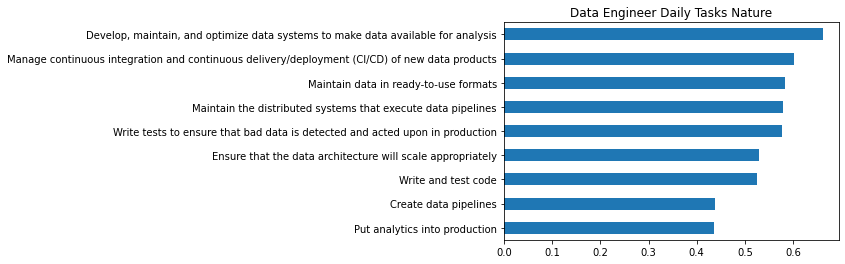

In [13]:
(result.sort_values(ascending=True) / df.shape[0]).plot( kind="barh" );
plt.title("Data Engineer Daily Tasks Nature");

In [23]:
counts = dict(df['Q5_M1'].value_counts())
counts

{'Focusing too much time on finding and fixing errors': 106,
 'Constantly playing catch up with stakeholder requests': 104,
 'Lack of feedback on the products delivered': 104,
 'Focusing too much on maintaining data pipelines and/or manual processes': 102,
 'Fast pace of requests from stakeholders': 90,
 'Unreasonable requests from stakeholders': 77,
 'I have never felt burnt out from my job': 17}

In [25]:
questions = ['Q5_M2','Q5_M3', 'Q5_M4','Q5_M5']
for i in questions:
 total_count = add_dict(dict(df[i].value_counts()))

total_count

{'Focusing too much time on finding and fixing errors': 301,
 'Constantly playing catch up with stakeholder requests': 296,
 'Lack of feedback on the products delivered': 282,
 'Focusing too much on maintaining data pipelines and/or manual processes': 297,
 'Fast pace of requests from stakeholders': 286,
 'Unreasonable requests from stakeholders': 251,
 'I have never felt burnt out from my job': 17}

In [26]:
result2 = pd.Series(total_count)

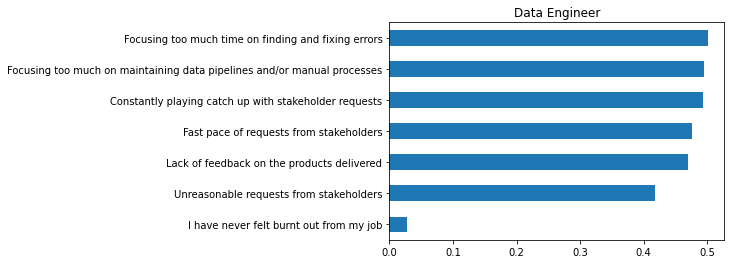

In [27]:
(result2.sort_values(ascending=True) / df.shape[0]).plot( kind="barh" );
plt.title("Data Engineer");

In [32]:
print(new_dict)

None


In [10]:
counts.update(dict(df['QA_M2'].value_counts()))
counts

{'Develop, maintain, and optimize data systems to make data available for analysis': 81,
 'Maintain data in ready-to-use formats': 63,
 'Ensure that the data architecture will scale appropriately': 68,
 'Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products': 75,
 'Maintain the distributed systems that execute data pipelines': 65,
 'Write tests to ensure that bad data is detected and acted upon in production': 80,
 'Write and test code': 57,
 'Create data pipelines': 53,
 'Put analytics into production': 58}

In [25]:
#result = pd.Series(data = counts)
#result
#(result / df.shape[0]).plot( kind="barh" );
#plt.title("Data Engineer Daily Tasks Nature");

<ipython-input-25-3b21c4269168>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result = pd.Series(data = counts)


Series([], dtype: float64)

In [4]:
df['QB'].shape

(600,)

In [18]:
df['QA_M2'].value_counts() 

Develop, maintain, and optimize data systems to make data available for analysis                 81
Write tests to ensure that bad data is detected and acted upon in production                     80
Manage continuous integration and continuous delivery/deployment (CI/CD) of new data products    75
Ensure that the data architecture will scale appropriately                                       68
Maintain the distributed systems that execute data pipelines                                     65
Maintain data in ready-to-use formats                                                            63
Put analytics into production                                                                    58
Write and test code                                                                              57
Create data pipelines                                                                            53
Name: QA_M2, dtype: int64

In [ ]:
df['QA_M4'].value_counts()

In [ ]:
df['QA_M8'].value_counts() 

In [19]:
df.groupby(['Q6']).mean()['QH'].sort_values().dropna()

Q6
Disagree strongly    2766.129032
Agree strongly       3599.490000
Agree somewhat       3966.018587
Disagree somewhat    5624.990000
Name: QH, dtype: float64

In [131]:
copy = df
copy['QH']

0      1500
1      2000
2        20
3       250
4       999
       ... 
595    3400
596     650
597     400
598    1500
599    1000
Name: QH, Length: 600, dtype: int64

In [103]:
copy['QH'] = copy['QH'].apply(int)
for i in copy['QH']:
 if type(i) is str:
   continue
 elif i <= 49:
    copy['QH'][i] = 'Very small company'
 elif i <= 299:
    copy['QH'][i] = 'Mid-size company'
 elif i <= 4999:
    copy['QH'][i] = 'Big Company'
 elif i <= 9999:
    copy['QH'][i] = 'Very big Company' 
 else:
    copy['QH'][i] = 'Worldwide Company' 
    


<ipython-input-103-953be0a1a130>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['QH'][i] = 'Big Company'
<ipython-input-103-953be0a1a130>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy['QH'][i] = 'Very small company'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-103-953be0a1a130>:14: Settin

In [104]:
copy['QH']

0      1500
1      2000
2        20
3       250
4       999
       ... 
595    3400
596     650
597     400
598    1500
599    1000
Name: QH, Length: 600, dtype: object

In [81]:
company_size

In [67]:
df['QH']

0                    1500
1                    2000
2      Very small company
3                     250
4                     999
              ...        
595                  3400
596                   650
597                   400
598                  1500
599                  1000
Name: QH, Length: 600, dtype: object

In [46]:
company_size

array('Big Company', dtype='<U21')

In [109]:
copy['QH']

0      1500
1      2000
2        20
3       250
4       999
       ... 
595    3400
596     650
597     400
598    1500
599    1000
Name: QH, Length: 600, dtype: int64

In [9]:
df['QH'].min()

5

In [10]:
df['QH'].max()

273000

In [132]:
copy['QH'] = copy['QH'].astype(np.int64)

In [133]:
criteria = [copy['QH'].between(0, 10), copy['QH'].between(11, 49),
            copy['QH'].between(50, 299), copy['QH'].between(300, 4999),
            copy['QH'].between(5000, 9999), copy['QH'].between(10000, 273000)]
Range_label = ['Very small company', 'Small company', 'Mid-size company', 'Big Company','Very big company','International company']

copy['QH'] = np.select(criteria, Range_label, 0)

In [134]:
copy['QH'].value_counts()

Big Company              429
Mid-size company          57
Very big company          54
International company     40
Small company             15
Very small company         5
Name: QH, dtype: int64

In [138]:
copy['Q6']

0      3
1      4
2      4
3      4
4      3
      ..
595    3
596    3
597    3
598    3
599    4
Name: Q6, Length: 600, dtype: int64

In [136]:
copy['Q6'] = copy['Q6'].map({'Agree strongly':4, 'Agree somewhat':3, 'Disagree somewhat':2, 'Disagree strongly':1}) 

In [137]:
copy.groupby(['QH']).mean()['Q6'].sort_values().dropna()

QH
Small company            2.733333
Mid-size company         2.964912
Big Company              3.055944
International company    3.125000
Very big company         3.203704
Very small company       3.800000
Name: Q6, dtype: float64

In [143]:
copy.corr()

,AGE,Q3,Q4,Q6
AGE,1.000000,0.005914,-0.018036,-0.045699
Q3,0.005914,1.000000,0.847608,0.319978
Q4,-0.018036,0.847608,1.000000,0.269318
Q6,-0.045699,0.319978,0.269318,1.000000


In [144]:
df.describe()

,AGE,Q3,Q4,Q6
count,600.000000,600.000000,600.000000,600.000000
mean,42.405000,32.466667,27.690000,3.063333
std,8.769406,18.496913,19.312747,0.838945
min,21.000000,1.000000,0.000000,1.000000
25%,36.000000,20.000000,14.750000,3.000000
50%,41.000000,30.000000,20.000000,3.000000
75%,50.000000,40.000000,40.000000,4.000000
max,66.000000,100.000000,100.000000,4.000000


The range is between 5 to 273000

Suggested range

| Employees No. | Range Label | 
| :-- | :--- |
| 0 - 10 | Very small company |
| 11 - 49 | Small company |
| 50 - 299 | Mid-size company |
| 300 - 4999 | Big Company |
| 5000 - 9999 | Very big company |
| 10000 or more | International company |
